(190, 230)


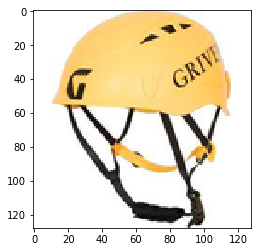

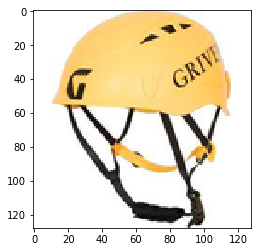

(128, 128)


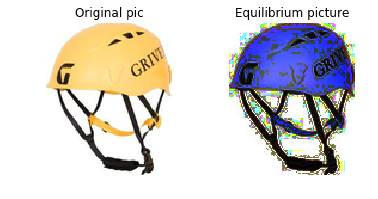

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:3075: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)
/Applications/anaconda/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


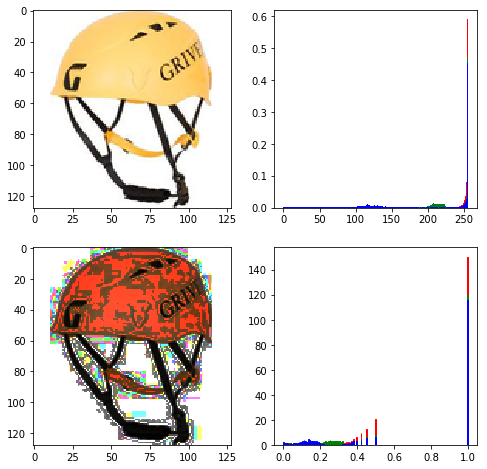

In [3]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc

desired_size = 128
im_pth = "125475.jpeg"

im = Image.open(im_pth)
old_size = im.size  # old_size[0] is in (width, height) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])

im = im.resize(new_size, Image.ANTIALIAS)
print(old_size)

# new_im = Image.new("RGB", (desired_size, desired_size),(255,255,255))
new_im = Image.new("RGB", (desired_size, desired_size),(255,255,255))

#方式一
new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))

# new_im.show()

imgplot = plt.imshow(new_im) #只能用这个形式展示图片
plt.show(imgplot)

#方式二
delta_w = desired_size - new_size[0]
delta_h = desired_size - new_size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_im = ImageOps.expand(im, padding,(255,255,255))

imgplot = plt.imshow(new_im)
plt.show(imgplot)

# plt.show(new_im)
print(new_im.size)

#### from PIL import Image
from numpy import *
from pylab import *

def histeq(im,nbr_bins = 256):
    """对一幅灰度图像进行直方图均衡化"""

    #计算图像的直方图
#     channle = [,im[:,:,1].flatten(),im[:,:,2].flatten()]
    imhist,bins = histogram(im.flatten(),nbr_bins,normed = False)
    cdf = imhist.cumsum() #累计分布函数
    cdf = 255 * cdf / cdf[-1] #归一化

    #使用累积分布函数的线性插值，计算新的像素值
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

#gray()
# im = array(Image.open("112127.jpeg").convert("RGBA"))
# im = array(Image.open("112127.jpeg"))
r,g,b=new_im.split()#分割成三个通道，此时r,g,b分别为三个图像对象。
im_r = array(r)
im_g = array(g)
im_b = array(b)
imr,cdf = histeq(im_r)
img,cdf = histeq(im_g)
imb,cdf = histeq(im_b)

im = array(new_im)

# imr,cdf = histeq(im[:,:,0])
# img,cdf = histeq(im[:,:,1])
# imb,cdf = histeq(im[:,:,2])
subplot(1,2,1)
imshow(im)
title("Original pic")
axis('off')

subplot(1,2,2)
# scipy.misc.imsave("imr.jpg",exposure.equalize_hist(imr))
# scipy.misc.imsave("img.jpg",exposure.equalize_hist(img))
# scipy.misc.imsave("imb.jpg",exposure.equalize_hist(imb))
r=Image.open("imr.jpg")
g=Image.open("img.jpg")
b=Image.open("imb.jpg")
merged = Image.merge('RGB',(b,g,r))
plt.imshow(merged)
title("Equilibrium picture")
axis('off')

# subplot(1,5,3)
# imshow(exposure.equalize_hist(imr))
# title("Equilibrium pic")
# axis('off')

# subplot(1,5,4)
# imshow(exposure.equalize_hist(img))
# title("Equ pic")
# axis('off')

# subplot(1,5,5)
# imshow(exposure.equalize_hist(imb))
# title("Equ pic")
# axis('off')

show()


from skimage import data,exposure
import matplotlib.pyplot as plt
img=array(new_im)
plt.figure("hist",figsize=(8,8))

plt.subplot(221)
plt.imshow(img,plt.cm.hot)  #原始图像
plt.subplot(222)
arr=im_r.flatten()
plt.hist(arr, bins=256, normed=1,edgecolor='None',facecolor='r',hold=1) #原始图像直方图

arg=im_g.flatten()
plt.hist(arg, bins=256, normed=1,edgecolor='None',facecolor='g',hold=1) #原始图像直方图

arb=im_b.flatten()
plt.hist(arb, bins=256, normed=1,edgecolor='None',facecolor='b') #原始图像直方图


img1=exposure.equalize_hist(img)
plt.subplot(223)
plt.imshow(img1,plt.cm.hot)  #均RGBA
plt.subplot(224)
arr1=img1[:,:,0].flatten()
plt.hist(arr1, bins=256, normed=1,edgecolor='r',facecolor='r',hold=1) #均衡化直方图

arg1=img1[:,:,1].flatten()
plt.hist(arg1, bins=256, normed=1,edgecolor='g',facecolor='g',hold=1) #均衡化直方图

arb1=img1[:,:,2].flatten()
plt.hist(arb1, bins=256, normed=1,edgecolor='b',facecolor='b') #均衡化直方图



plt.show()